In [17]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from keras.callbacks import History

In [18]:
y_train = pd.read_csv('./train/y_train.csv')
y_test = pd.read_csv('./test/y_test.csv')

X_train = pd.read_csv('./train/X_train.csv')
X_test = pd.read_csv('./test/X_test.csv')

In [19]:
history = History()
model = Sequential()
model.add(Dense(8, input_dim=8,activation='relu')) # 8 neurons for the first layers taking 8 input
model.add(Dense(4, activation='relu')) #4 neurons in the second layer
model.add(Dense(1,activation='sigmoid')) #1 neurons in the output layer
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 5         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


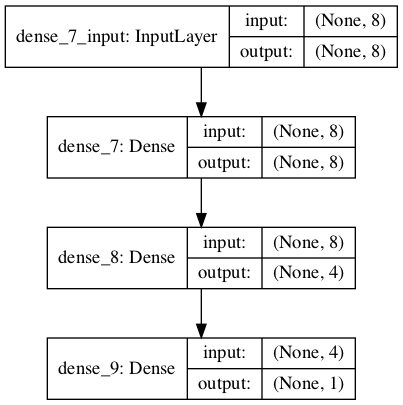

In [20]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [22]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, mode='min', verbose=1)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1500, batch_size=140, verbose=0, callbacks=[history, early_stopping])


Epoch 00273: early stopping


In [23]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

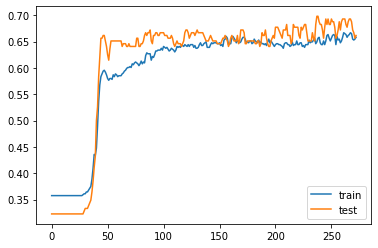

In [24]:
plt.plot(history.history['accuracy'], label = "train")
plt.plot(history.history['val_accuracy'], label = "test")


plt.legend()
plt.show()

In [25]:
_,accuracy = model.evaluate(X_train,y_train,verbose=0)
accuracy*100

64.93055820465088

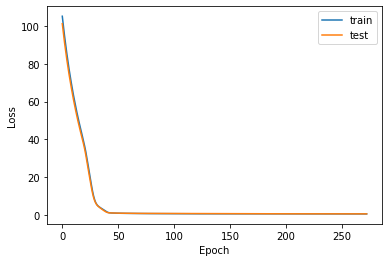

In [26]:
plt.plot(history.history['loss'], label = "train")
plt.plot(history.history['val_loss'], label = "test")
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend()
plt.show()

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Flatten
from keras.callbacks import History

history_2 = History()
model_2 = Sequential()
# Input layer
model_2.add(Dense(64, input_dim=8, kernel_initializer='uniform', activation='relu'))
model_2.add(Dropout(0.4))
# Hidden layer 1
model_2.add(Dense(32, kernel_initializer='uniform', activation='relu'))
model_2.add(Dropout(0.5))
# Output layer
model_2.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 64)                576       
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


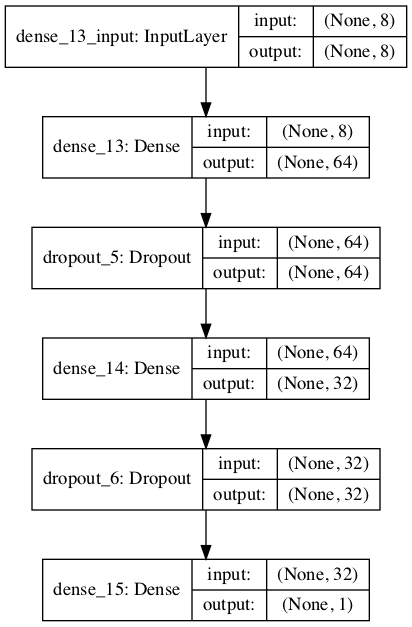

In [32]:
plot_model(model_2, to_file='model_2_plot.png', show_shapes=True, show_layer_names=True)

In [33]:
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
# from keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=15, mode='min', verbose=1)
model_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1500, verbose=0, batch_size=140, callbacks=[history_2])

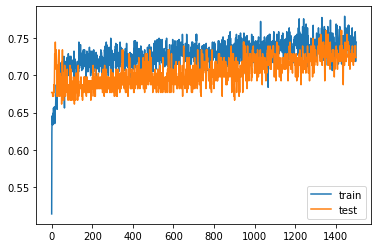

In [35]:
plt.plot(history_2.history['accuracy'], label = "train")
plt.plot(history_2.history['val_accuracy'], label = "test")


plt.legend()
plt.show()

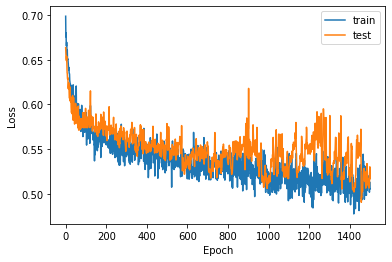

In [36]:
plt.plot(history_2.history['loss'], label = "train")
plt.plot(history_2.history['val_loss'], label = "test")
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend()
plt.show()

In [37]:
_,accuracy = model_2.evaluate(X_train,y_train,verbose=0)
accuracy*100

72.91666865348816

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import Normalizer
from keras.layers import Activation, Dense, Dropout, BatchNormalization, Input
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

def nn():
    inputs = Input(name='inputs', shape=[X_train.shape[1],])
    layer = Dense(128, name='FC1')(inputs)
    layer = BatchNormalization(name='BC1')(layer)
    layer = Activation('relu', name='Activation1')(layer)
    layer = Dropout(0.3, name='Dropout1')(layer)
    layer = Dense(128, name='FC2')(layer)
    layer = BatchNormalization(name='BC2')(layer)
    layer = Activation('relu', name='Activation2')(layer)
    layer = Dropout(0.3, name='Dropout2')(layer)
    layer = Dense(128, name='FC3')(layer)
    layer = BatchNormalization(name='BC3')(layer)
    layer = Dropout(0.3, name='Dropout3')(layer)
    layer = Dense(1, name='OutLayer')(layer)
    layer = Activation('sigmoid', name='sigmoid')(layer)
    model = Model(inputs=inputs, outputs=layer)
    return model

In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [13]:
history_3 = History()
model_3 = nn()
model_3.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 8)                 0         
_________________________________________________________________
FC1 (Dense)                  (None, 128)               1152      
_________________________________________________________________
BC1 (BatchNormalization)     (None, 128)               512       
_________________________________________________________________
Activation1 (Activation)     (None, 128)               0         
_________________________________________________________________
Dropout1 (Dropout)           (None, 128)               0         
_________________________________________________________________
FC2 (Dense)                  (None, 128)               16512     
_________________________________________________________________
BC2 (BatchNormalization)     (None, 128)               512 

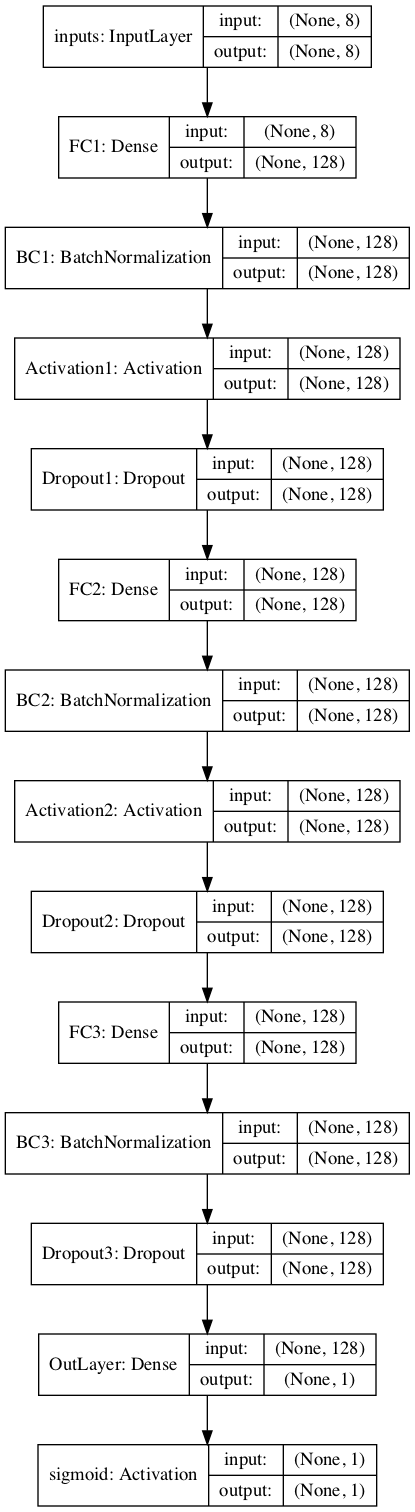

In [15]:
plot_model(model_3, to_file='model_3_plot.png', show_shapes=True, show_layer_names=True)

In [131]:
model_3.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [132]:
model_3.fit(x=X_train, y=y_train, epochs=1500, validation_data=(X_test, y_test), verbose=0, batch_size=140, callbacks=[history_3])

In [133]:
_,accuracy = model_3.evaluate(X_train,y_train,verbose=0)
accuracy*100

92.70833134651184

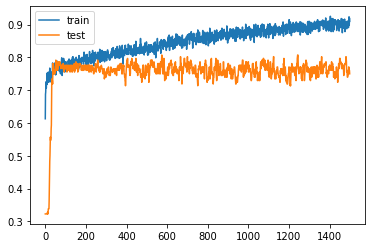

In [134]:
plt.plot(history_3.history['accuracy'], label = "train")
plt.plot(history_3.history['val_accuracy'], label = "test")


plt.legend()
plt.show()

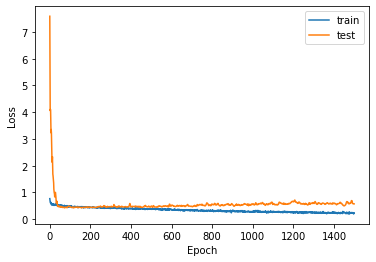

In [150]:
plt.plot(history_3.history['loss'], label = "train")
plt.plot(history_3.history['val_loss'], label = "test")
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend()
plt.show()

In [136]:
y_pred_train = model_3.predict(X_train)
y_pred_test = model_3.predict(X_test)

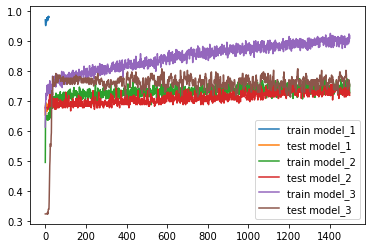

In [146]:
plt.plot(history.history['accuracy'], label = "train model_1")
plt.plot(history.history['val_accuracy'], label = "test model_1")

plt.plot(history_2.history['accuracy'], label = "train model_2")
plt.plot(history_2.history['val_accuracy'], label = "test model_2")

plt.plot(history_3.history['accuracy'], label = "train model_3")
plt.plot(history_3.history['val_accuracy'], label = "test model_3")

plt.legend()
plt.show()